In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
data = pd.read_csv('D:\project\dataset\CSV_Files\jshare_TimeSeries.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


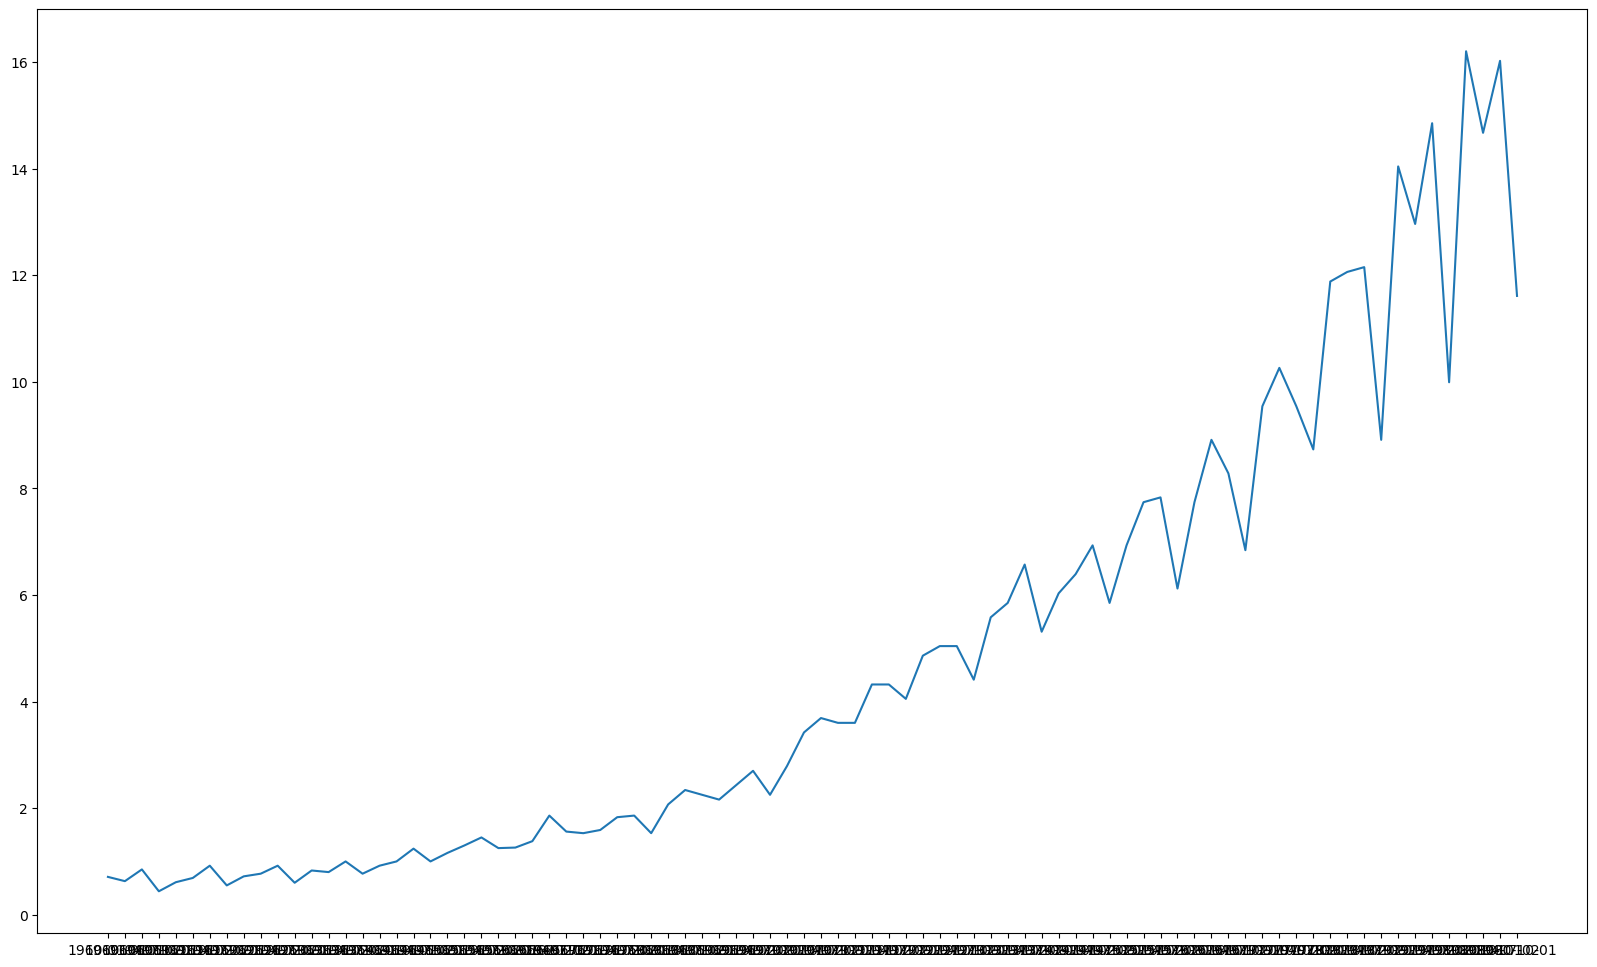

In [139]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [140]:
from statsmodels.tsa.stattools import adfuller

In [141]:
adfuller(data['data']) # Null --> None Stationary

(2.7420165734574784,
 1.0,
 11,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 82.63760283301107)

In [142]:
data['data'] = np.log(data['data'])

In [143]:
adfuller(data['data'])

(-0.8040574622338377,
 0.8179273123168609,
 4,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 -142.1892728398871)

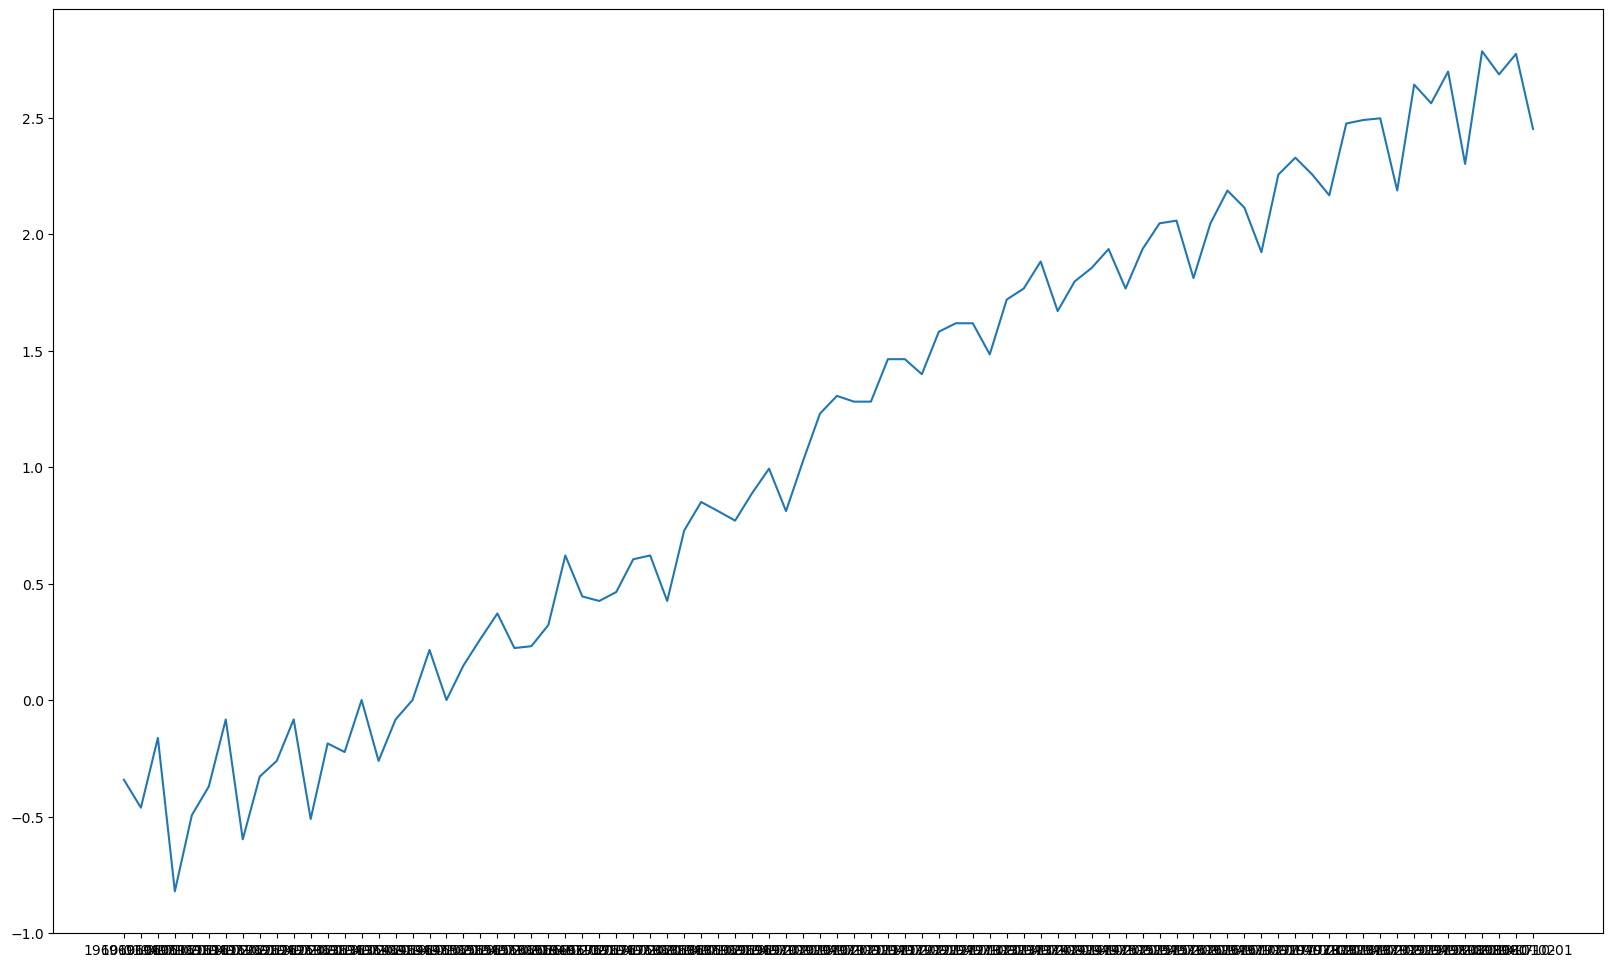

In [144]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [145]:
sample = pd.Series([1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
sample.diff(4)

0     NaN
1     NaN
2     NaN
3     NaN
4     4.0
5     7.0
6    11.0
7    18.0
8    29.0
9    47.0
dtype: float64

In [146]:
data['data_diffed'] = data['data'].diff()

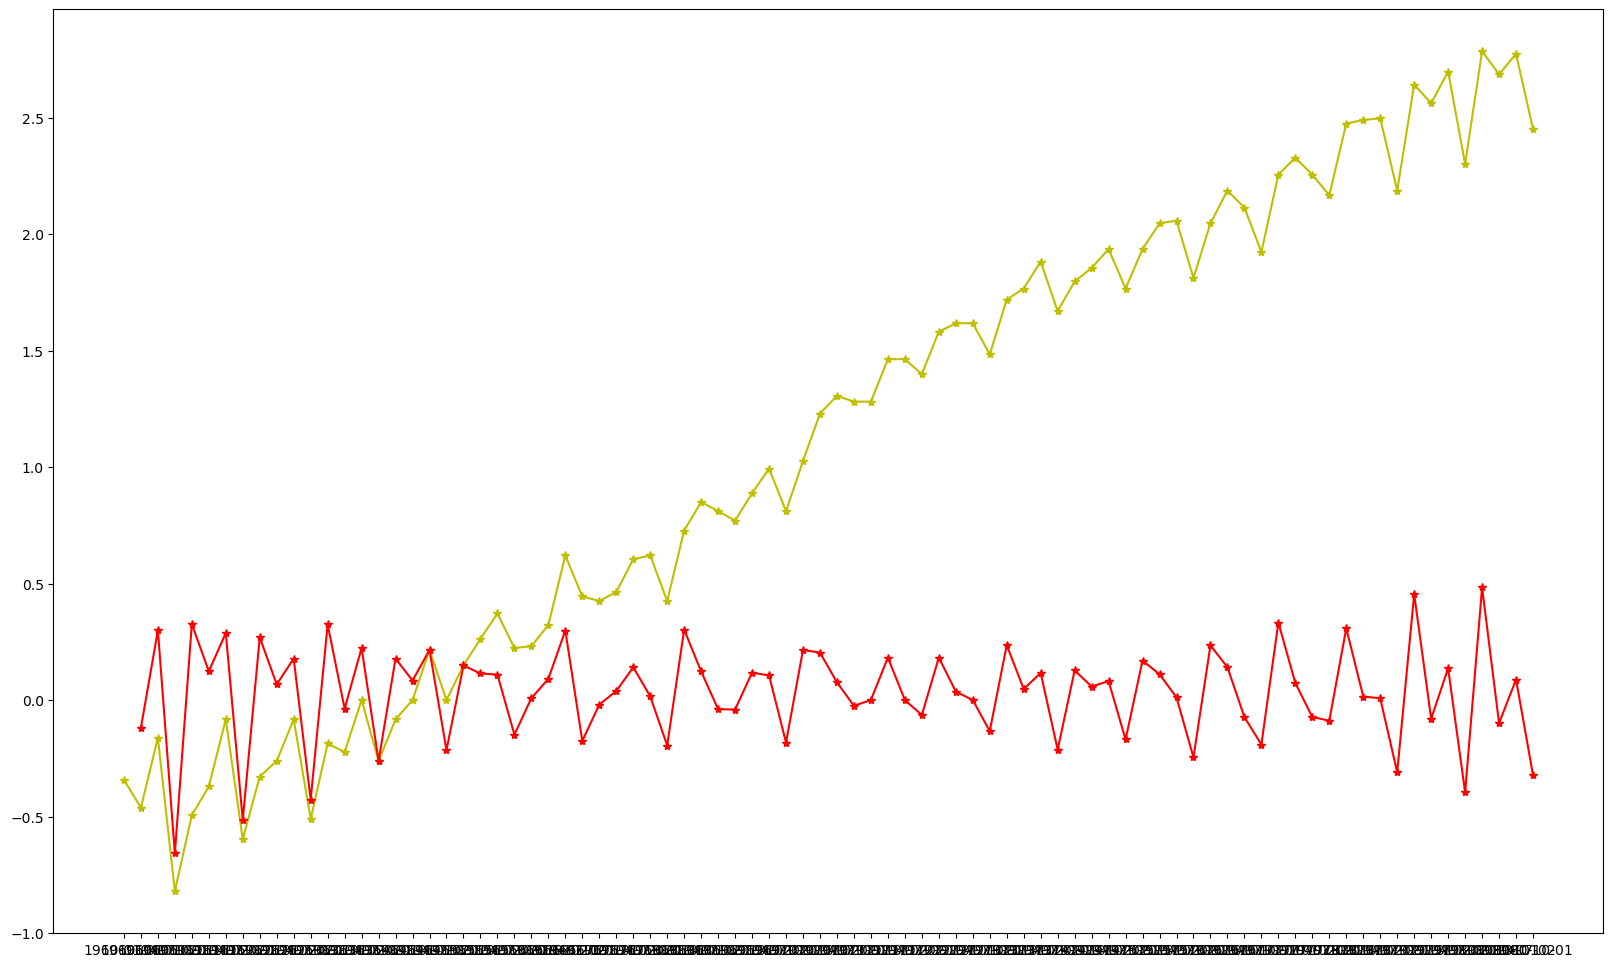

In [147]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'], 'y*-', )# That's the old data
plt.plot(data['date'], data['data_diffed'], 'r*-')# It's the diffed data, it shows that would be stationary after a diff operation
plt.show()

In [148]:
data

,date,data,data_diffed
0,1960-01-01,-0.342490,NaN
1,1960-04-01,-0.462035,-0.119545
2,1960-07-02,-0.162519,0.299517
3,1960-10-01,-0.820981,-0.658462
4,1961-01-01,-0.494296,0.326684
...,...,...,...
79,1979-10-01,2.301585,-0.396415
80,1980-01-01,2.785011,0.483427
81,1980-04-01,2.685805,-0.099207
82,1980-07-02,2.773838,0.088033


In [149]:
data = data.drop(data.index[0])# Because the first value is null, and causes problem for adfuller
adfuller(data['data_diffed'])

(-4.317043945811847,
 0.0004149731404440487,
 5,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 -140.72022082452924)

In [151]:
data['data_diffed_4'] = data['data_diffed'].diff(4)# minis the value of ith index by the value of (i-4)th index

In [152]:
data

,date,data,data_diffed,data_diffed_4
1,1960-04-01,-0.462035,-0.119545,NaN
2,1960-07-02,-0.162519,0.299517,NaN
3,1960-10-01,-0.820981,-0.658462,NaN
4,1961-01-01,-0.494296,0.326684,NaN
5,1961-04-02,-0.371064,0.123233,0.242778
...,...,...,...,...
79,1979-10-01,2.301585,-0.396415,-0.086260
80,1980-01-01,2.785011,0.483427,0.028690
81,1980-04-01,2.685805,-0.099207,-0.019164
82,1980-07-02,2.773838,0.088033,-0.048099


In [153]:
data = data.drop([1,2, 3, 4], axis=0)# Axis=0 equals to row and axis=1 refere to column


In [154]:
data

,date,data,data_diffed,data_diffed_4
5,1961-04-02,-0.371064,0.123233,0.242778
6,1961-07-02,-0.083382,0.287682,-0.011834
7,1961-10-01,-0.597837,-0.514455,0.144006
8,1962-01-01,-0.328504,0.269333,-0.057351
9,1962-04-02,-0.261365,0.067139,-0.056093
...,...,...,...,...
79,1979-10-01,2.301585,-0.396415,-0.086260
80,1980-01-01,2.785011,0.483427,0.028690
81,1980-04-01,2.685805,-0.099207,-0.019164
82,1980-07-02,2.773838,0.088033,-0.048099


In [156]:
adfuller(data['data_diffed_4'])# the second item in adfuller shows sattionary of dataset, if it like to zero so the data is stationar

(-6.630805109914263,
 5.72157869513621e-09,
 5,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 -130.6040481022201)

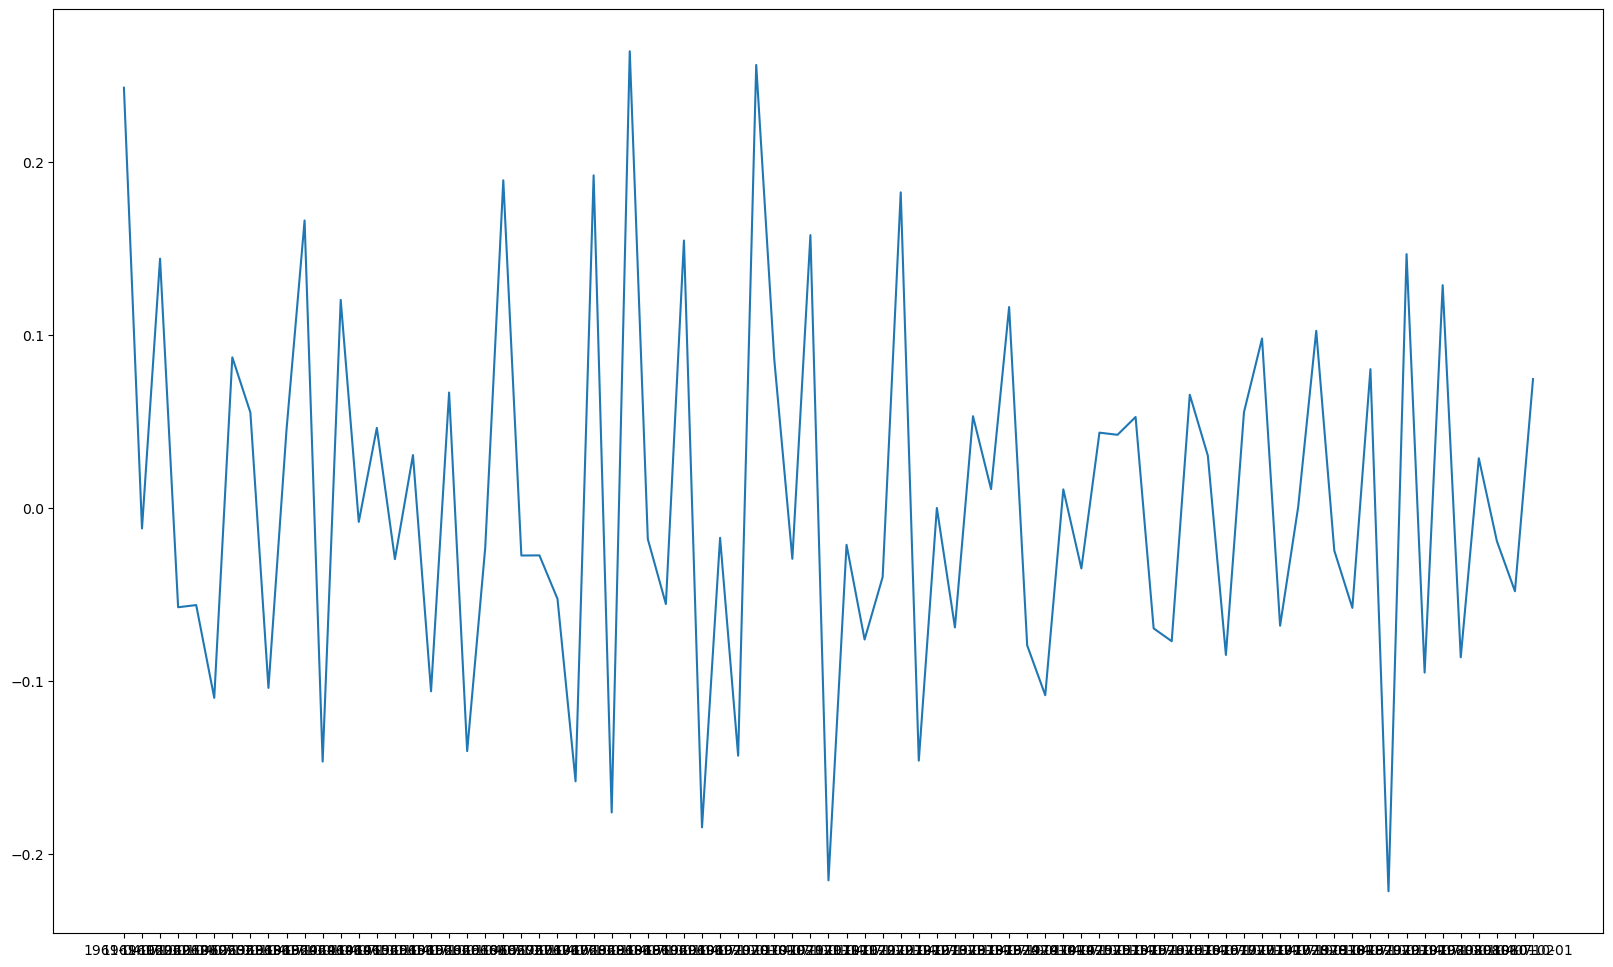

In [157]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data_diffed_4'])
plt.show()

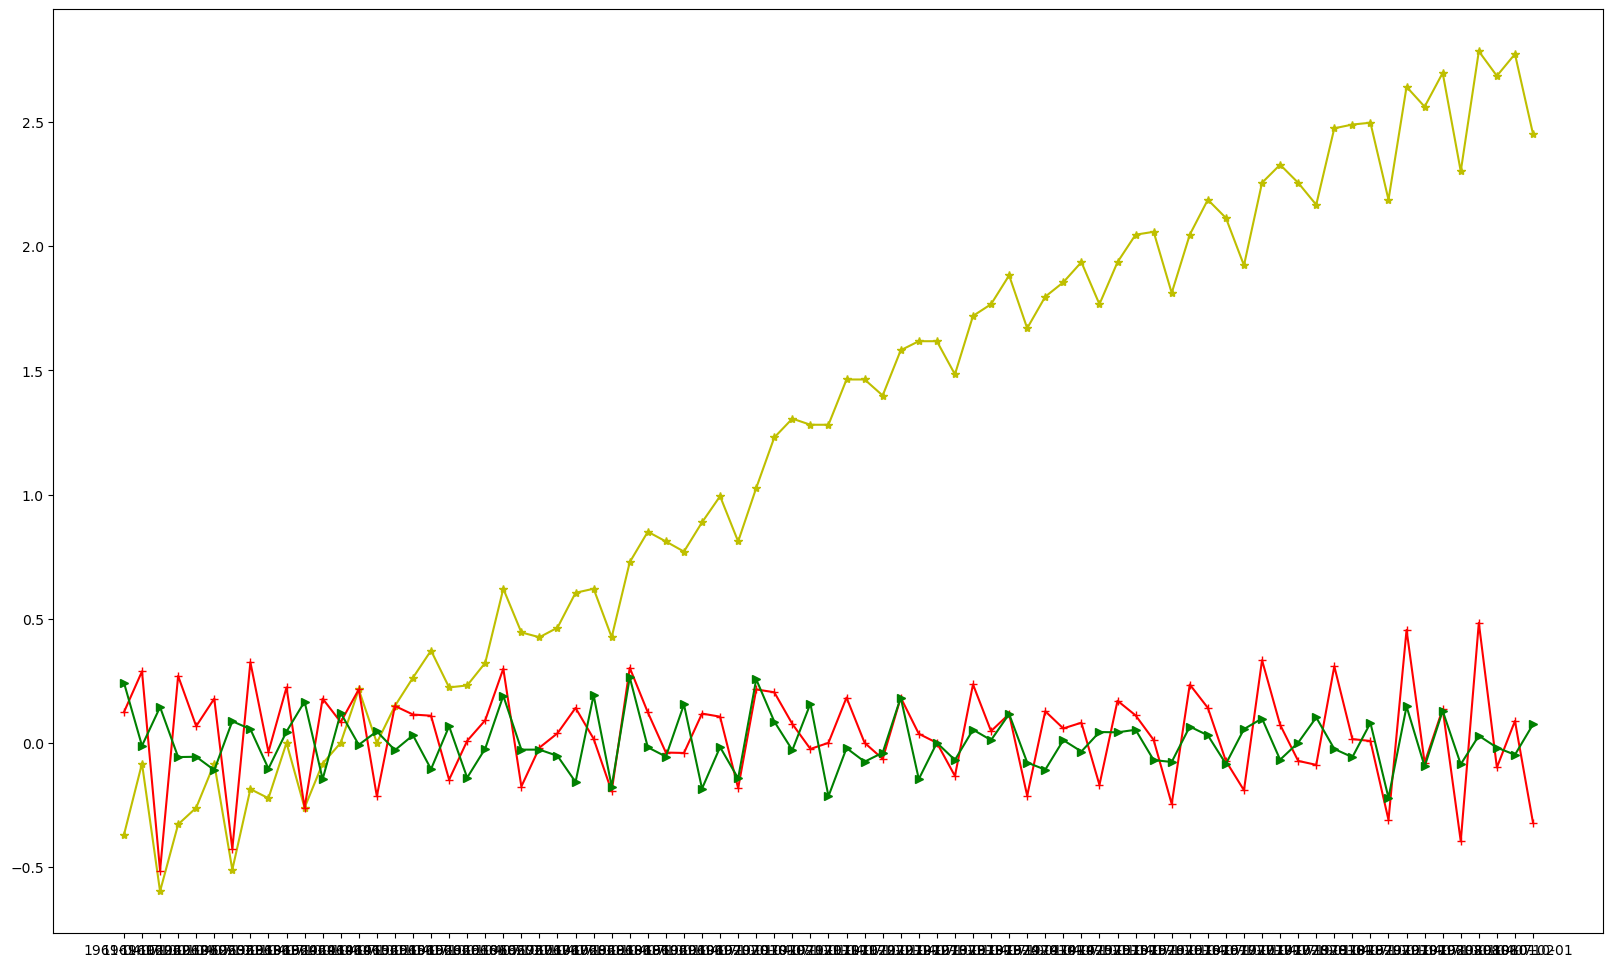

In [158]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'], 'y*-', )# The original data
plt.plot(data['date'], data['data_diffed'], 'r+-')# the diffed data
plt.plot(data['date'], data['data_diffed_4'], 'g>-')# the diffed 4 data
plt.show()

# For any SAIMAX modelling, we have to use plenty diff of time series data, to obtine a stationary dataset

In [159]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [160]:
data2 = pd.read_csv('D:\project\dataset\CSV_Files\jshare_TimeSeries.csv')
data2.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [161]:
model = SARIMAX(data['data_diffed_4'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))# order(AR, I, MA), seasonal_order=(AR, I, MA, segment_lenght)

In [162]:
res = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# if AIC lead to minimum it shows that our model is good.

In [163]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                          data_diffed_4   No. Observations:                   79
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                  66.070
Date:                                Sat, 24 Dec 2022   AIC                           -110.141
Time:                                        13:33:37   BIC                            -84.796
Sample:                                             0   HQIC                          -100.030
                                                 - 79                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4634      0.098    -14.928      0.000      -1.656      -1.271
ar.L2         -1.4091      0.099    -14.292      0.000      -1.602      -1.216
ar.L3         -0.6337      0.112     -5.670      0.000      -0.853      -0.415
ma.L1          0.0059      7.505      0.001      0.999     -14.703      14.715
ma.L2         -0.0408      7.535     -0.005      0.996     -14.808      14.727
ma.L3         -0.9624      7.223     -0.133      0.894     -15.119      13.194
ar.S.L4       -1.4844      0.156     -9.525      0.000      -1.790      -1.179
ar.S.L8       -0.6304      0.132     -4.782      0.000      -0.889      -0.372
ma.S.L4        0.0739      0.763      0.097      0.923      -1.422       1.570
ma.S.L8       -0.8831      0.694     -1.272      0.203      -2.244       0.478
sigma2         0.0069      0.052      0.133      0.895      -0.095       0.109
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.27   Prob(JB):                         0.68
Heteroskedasticity (H):               0.51   Skew:                             0.18
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
data['sarimax'] = res.fittedvalues

In [165]:
data

,date,data,data_diffed,data_diffed_4,sarimax
5,1961-04-02,-0.371064,0.123233,0.242778,0.000000
6,1961-07-02,-0.083382,0.287682,-0.011834,0.242778
7,1961-10-01,-0.597837,-0.514455,0.144006,-0.011834
8,1962-01-01,-0.328504,0.269333,-0.057351,0.144006
9,1962-04-02,-0.261365,0.067139,-0.056093,0.064038
...,...,...,...,...,...
79,1979-10-01,2.301585,-0.396415,-0.086260,-0.041945
80,1980-01-01,2.785011,0.483427,0.028690,0.072780
81,1980-04-01,2.685805,-0.099207,-0.019164,-0.023374
82,1980-07-02,2.773838,0.088033,-0.048099,-0.081712


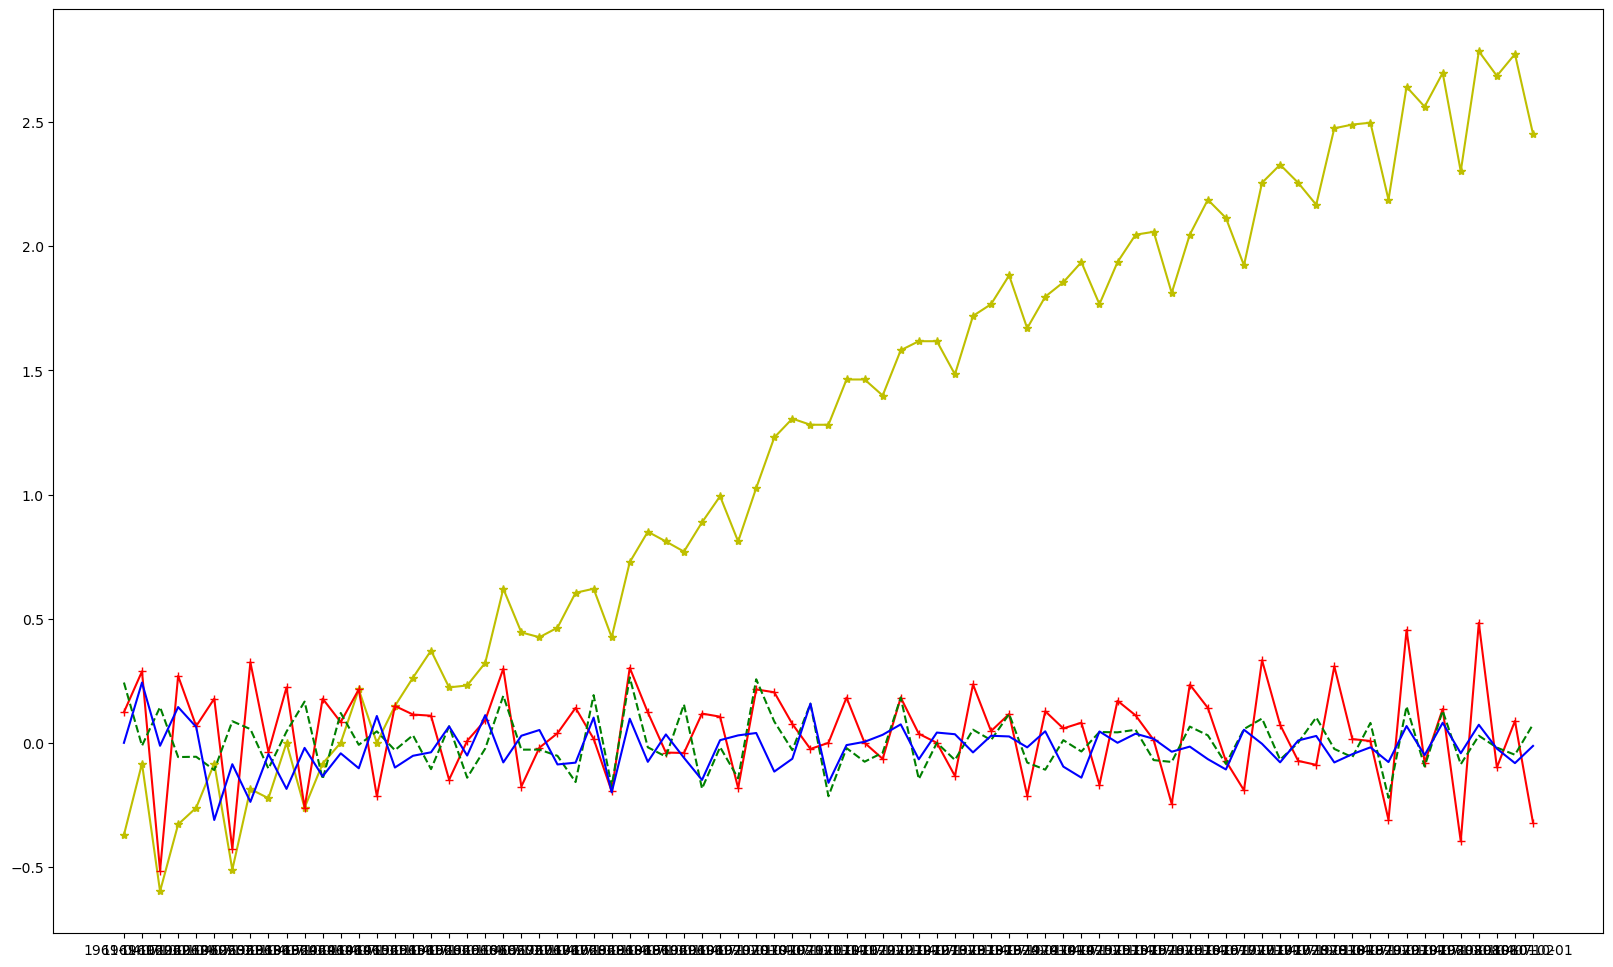

In [167]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'], 'y*-', )# The original data
plt.plot(data['date'], data['data_diffed'], 'r+-')# the diffed data
plt.plot(data['date'], data['data_diffed_4'],'g--')
plt.plot(data['date'], data['sarimax'], 'b')
plt.show()

# Try to use predict foncution

In [168]:
data

,date,data,data_diffed,data_diffed_4,sarimax
5,1961-04-02,-0.371064,0.123233,0.242778,0.000000
6,1961-07-02,-0.083382,0.287682,-0.011834,0.242778
7,1961-10-01,-0.597837,-0.514455,0.144006,-0.011834
8,1962-01-01,-0.328504,0.269333,-0.057351,0.144006
9,1962-04-02,-0.261365,0.067139,-0.056093,0.064038
...,...,...,...,...,...
79,1979-10-01,2.301585,-0.396415,-0.086260,-0.041945
80,1980-01-01,2.785011,0.483427,0.028690,0.072780
81,1980-04-01,2.685805,-0.099207,-0.019164,-0.023374
82,1980-07-02,2.773838,0.088033,-0.048099,-0.081712


In [169]:
len(data)

79

In [ ]:
forecast_data = res.predict(start=len(data), end=len(data2) + 8)

# Now works on Data2 without diff operation

In [122]:
model2 = SARIMAX(data2['data'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))# order(AR, I, MA), seasonal_order=(AR, I, MA, segment_lenght)

In [124]:
res2 = model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   data   No. Observations:                   84
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                 -39.006
Date:                                Fri, 23 Dec 2022   AIC                            100.013
Time:                                        13:12:06   BIC                            126.077
Sample:                                             0   HQIC                           110.455
                                                 - 84                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5937      0.207     -7.700      0.000      -1.999      -1.188
ar.L2         -0.9801      0.331     -2.965      0.003      -1.628      -0.332
ar.L3         -0.1403      0.194     -0.722      0.470      -0.521       0.240
ma.L1          0.8373      0.452      1.851      0.064      -0.049       1.724
ma.L2          0.0054      0.342      0.016      0.987      -0.665       0.676
ma.L3         -0.6580      0.402     -1.638      0.101      -1.445       0.129
ar.S.L4       -0.3633      0.787     -0.461      0.644      -1.907       1.180
ar.S.L8       -0.7527      0.809     -0.931      0.352      -2.338       0.832
ma.S.L4        0.2536      0.769      0.330      0.742      -1.254       1.761
ma.S.L8        0.8342      0.765      1.091      0.275      -0.664       2.333
sigma2         0.1455      0.091      1.602      0.109      -0.033       0.323
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                21.92
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              26.52   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
data2

,date,data,sarimax
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,NaN
2,1960-07-02,0.85,NaN
3,1960-10-01,0.44,NaN
4,1961-01-01,0.61,NaN
...,...,...,...
79,1979-10-01,9.99,-0.041945
80,1980-01-01,16.20,0.072780
81,1980-04-01,14.67,-0.023374
82,1980-07-02,16.02,-0.081712


In [134]:
data2['sarimax'][:5] = np.NaN
forecast = res2.predict(start=len(data2), end=len(data2) + 8)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18084\3954952749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sarimax'][:5] = np.NaN


In [135]:
len(data2)

84

In [136]:
forecast


84    17.362405
85    16.563897
86    17.323111
87    13.021413
88    18.873687
89    17.864216
90    18.890382
91    14.387896
92    20.408642
Name: predicted_mean, dtype: float64

In [129]:
forecast = data2['sarimax'].append(forecast)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18084\583517976.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = data2['sarimax'].append(forecast)


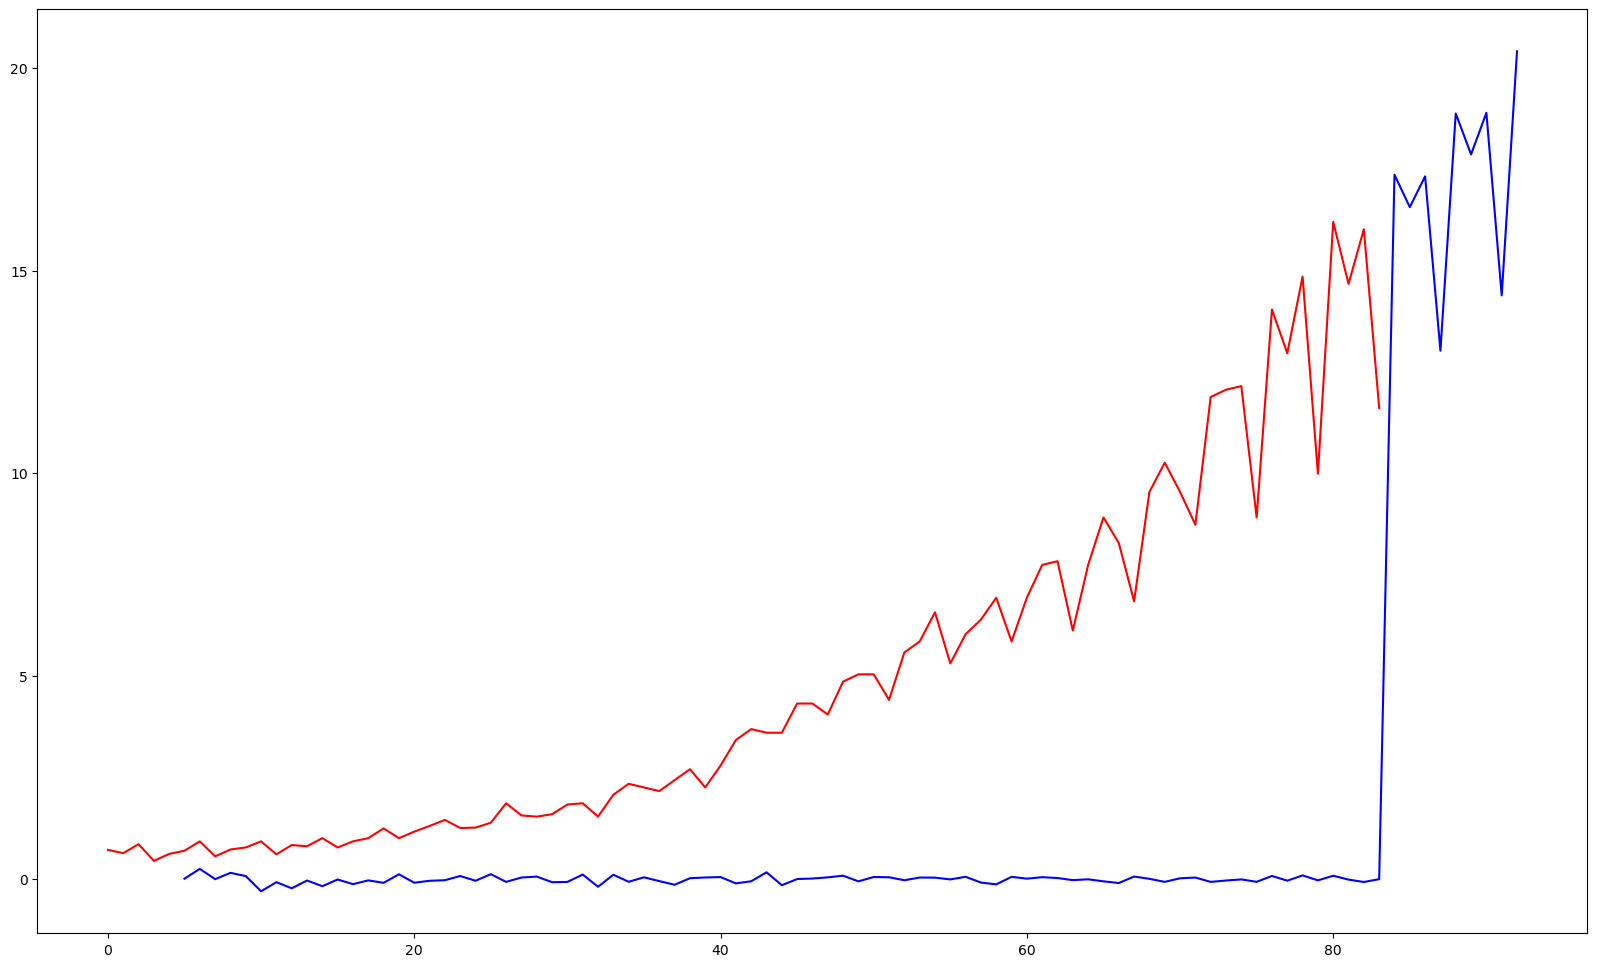

In [132]:
plt.figure(figsize=(20, 12))
plt.plot(data2['data'], 'r-')
plt.plot(forecast, 'b-')
plt.show()

In [14]:
from itertools import product
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
ps = range(0, 2, 1)
ds = 1
qs = range(0, 2, 1)
s = 4
params = list(product(p, q, ps, qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [15]:
results = []
for order in params:
    try:
        model = SARIMAX(data2['data'], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model.fit()
        results.append([order, res.aic])
    except:
        continue

In [16]:
r = pd.DataFrame(results)
r.columns = ('order', 'AIC')
r.sort_values(by='AIC', ascending=True)

,order,AIC
12,"(1, 1, 0, 0)",98.207760
4,"(0, 1, 0, 0)",100.126011
14,"(1, 1, 1, 0)",100.166907
13,"(1, 1, 0, 1)",100.170544
8,"(1, 0, 0, 0)",100.206514
6,"(0, 1, 1, 0)",100.713769
5,"(0, 1, 0, 1)",100.714480
7,"(0, 1, 1, 1)",101.256783
9,"(1, 0, 0, 1)",102.158002
15,"(1, 1, 1, 1)",102.160852


In [23]:
model = SARIMAX(data2['data'], order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               data   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 -46.104
Date:                            Sat, 27 Feb 2021   AIC                             98.208
Time:                                    03:02:27   BIC                            105.316
Sample:                                         0   HQIC                           101.056
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3005      0.142     -2.114      0.035      -0.579      -0.022
ma.L1         -0.6118      0.091     -6.738      0.000      -0.790      -0.434
sigma2         0.1860      0.023      8.108      0.000       0.141       0.231
===================================================================================
Ljung-Box (Q):                       45.28   Jarque-Bera (JB):                31.82
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              33.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
data2['sarimax'][:5] = np.NaN
forecast = res.predict(start=len(data2), end=len(data2) + 8)

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
forecast = data2['sarimax'].append(forecast)

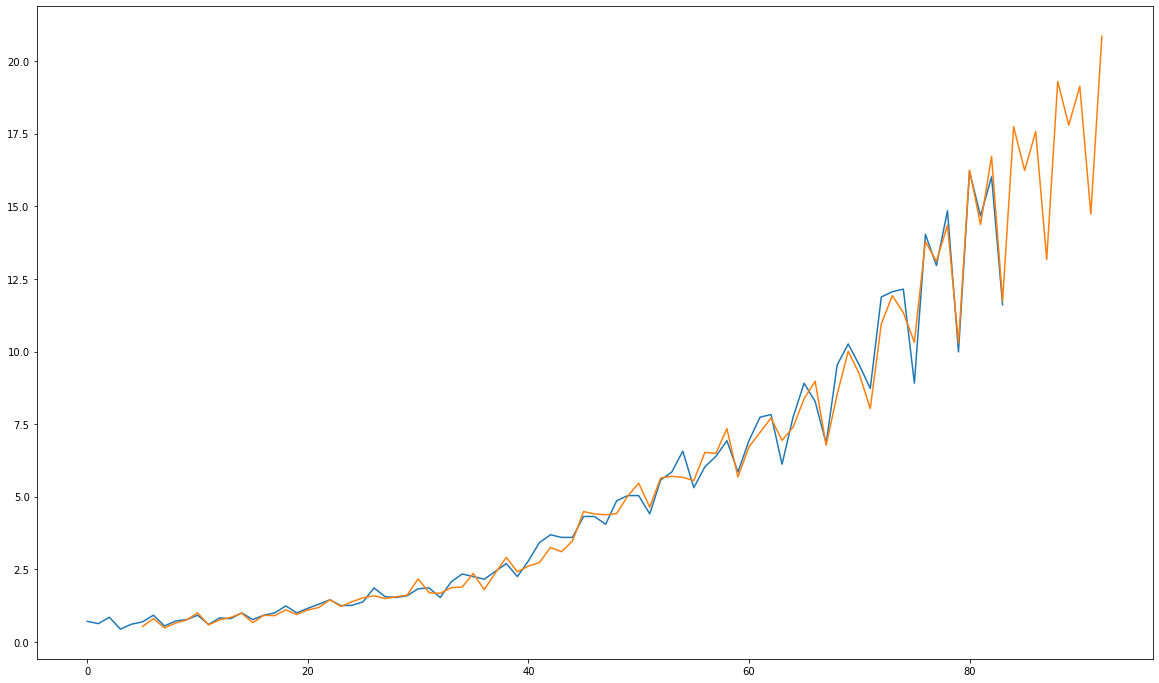

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(data2['data'])
plt.plot(forecast)
plt.show()